In [16]:
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set()

import numpy as np

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [8]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [11]:
px.scatter(circles, x = "X0", y = "X1", color="label", width=600, height=600)

In [89]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10,activation='tanh'),
  tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.015),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# 3. Fit the model
history = model_1.fit(X, y, epochs=55)#, callbacks=[lr_scheduler])

Epoch 1/55
32/32 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5100
Epoch 2/55
32/32 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5640
Epoch 3/55
32/32 [==============================] - 0s 4ms/step - loss: 0.6483 - accuracy: 0.6230
Epoch 4/55
32/32 [==============================] - 0s 4ms/step - loss: 0.5970 - accuracy: 0.7500
Epoch 5/55
32/32 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.8530
Epoch 6/55
32/32 [==============================] - 0s 3ms/step - loss: 0.3804 - accuracy: 0.9250
Epoch 7/55
32/32 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.9580
Epoch 8/55
32/32 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9900
Epoch 9/55
32/32 [==============================] - 0s 4ms/step - loss: 0.1307 - accuracy: 0.9920
Epoch 10/55
32/32 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9970
Epoch 11/55
32/32 [

In [90]:
# Checkout the history
df_hystory = pd.DataFrame(history.history)
px.line(df_hystory,markers=True)#.plot(figsize=(10,7), xlabel="epochs");

In [88]:
px.line(df_hystory, x= "lr", y=["loss","accuracy"],markers=True)

In [75]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


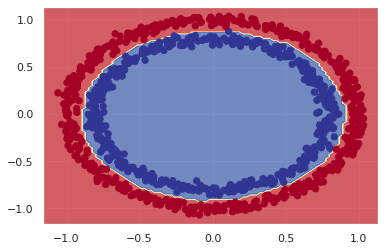

In [76]:
plot_decision_boundary(model_1, X, y)

In [91]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 493us/step - loss: 0.0130 - accuracy: 0.9970


[0.012966404668986797, 0.996999979019165]